** **
#### Step 1: Loading Data <a class="anchor\" id="load_data"></a>
** **

In [59]:
import pandas as pd

In [60]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("/content/dataset.csv", delimiter=";")
df

,Comment
0,adaptasi drakor kenapa jadi macem adaptasi fil...
1,dulu waktu gw ada drama pentas buat ujian seko...
2,itu kalo anda mau belajar lah lulus aja kagak ...
3,betul bang abizhar sebenarnya msh bisa dibimbi...
4,karena rame gua penasaran liat interview abidz...
...,...
745,ga masalah kalo visual mah kan remake indo ini...
746,yang salah attitude abidzarnya sih dia bilang ...
747,yang kasihan bukan dia atau para fans tapi tim...
748,lagian zaman masih gatau target pasar netizen ...


** **
#### Step 2: Data Cleaning <a class="anchor\" id="clean_data"></a>
** **

In [61]:
import pandas as pd
import re
import html
import string

# Download NLTK for getting the stopwords
import nltk
nltk.download('stopwords')

# Use NLTK Corpus for stopwords dictionary
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


** **
Source of Abbrevation CSV. https://github.com/khumam/Singkatan

In [62]:
# Download Abbreviation CSV
!wget -O abbreviation.csv \
https://raw.githubusercontent.com/khumam/Singkatan/master/src/Singkatan/Dictionary/singkatan.csv

--2025-12-16 14:08:10--  https://raw.githubusercontent.com/khumam/Singkatan/master/src/Singkatan/Dictionary/singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17601 (17K) [text/plain]
Saving to: ‘abbreviation.csv’

abbreviation.csv    100%[===================>]  17.19K  --.-KB/s    in 0.002s  

2025-12-16 14:08:10 (10.4 MB/s) - ‘abbreviation.csv’ saved [17601/17601]



In [63]:
# Import singkatan.csv for normalize abbreviation and set name colums
abbreviation = pd.read_csv("/content/abbreviation.csv", delimiter=";", names=["abbreviation", "meaning"])
abbreviation.head()

,abbreviation,meaning
0,aamiin,amin
1,adek,adik
2,adlh,adalah
3,aer,air
4,aiskrim,es krim


In [64]:
# Set into type dictionary for abbreviation corpus
abbr_dict = dict(
    zip(abbreviation["abbreviation"], abbreviation["meaning"])
)
abbr_dict

{'aamiin': 'amin ',
 'adek': 'adik ',
 'adlh': 'adalah ',
 'aer': 'air ',
 'aiskrim': 'es krim ',
 'aj': 'saja ',
 'aja': 'saja ',
 'ajah': 'saja ',
 'ajalah': 'saja ',
 'aje': 'saja ',
 'ajh': 'saja',
 'ajj': 'saja',
 'aku': 'saya',
 'ak': 'saya ',
 'akoh': 'saya',
 'akutu': 'saya',
 'aq': 'saya',
 'alesan': 'alasan ',
 'ama': 'sama ',
 'amaca': 'ah masa',
 'amuh': 'kamu',
 'ancur': 'hancur ',
 'ane': 'saya ',
 'anget': 'hangat ',
 'anjeng': 'anjing ',
 'ank': 'anak ',
 'apah': 'apa ',
 'aph': 'apa',
 'apo': 'apa ',
 'apose': 'apa',
 'apz': 'apa',
 'artine': 'artinya ',
 'asek': 'asik ',
 'ati2': 'hati-hati ',
 'atit': 'sakit ',
 'atu': 'satu ',
 'atw': 'atau ',
 'ayang': 'sayang ',
 'ayuk': 'ayo ',
 'babang': 'abang',
 'bae': 'baik ',
 'bais': 'habis',
 'bakalan': 'akan ',
 'bales': 'balas ',
 'bandingin': 'bandingkan ',
 'banget': 'sekali ',
 'bangett': 'sangat ',
 'banyakin': 'perbanyak ',
 'barengan': 'bersamaan ',
 'baryaw': 'sabar ya',
 'baso': 'bakso ',
 'bay': 'selamat tinggal

In [65]:
from nltk.corpus import stopwords

# Indonesian stopwords
sw_indo = set(stopwords.words("indonesian"))

# custom stopwords (lowercase!)
custom_stopwords = [
    "yang", "saja", "nya", "begitu", "memang", "bilang", "sama", "film", "sih", "karena", "si", "drama", "tidak",
    "kali", "ya", "salah", "bikin", "pas", "mah", "orang", "gimana", "aslinya", "tuh", "filmnya", "nonton",
    "pakai", "liat", "baca", "tuh", "bang", "main", "kaya", "korea", "netizen", "jujur", "indo", "biar",
    "cocok", "kek", "suka", "anak", "minimal", "asli", "kdrama", "belajar", "sekolah", "apapun", "kpop",
    "langsung", "loh", "namanya", "ceritanya", "jam", "kena", "beda", "ikuti", "intinya", "nih", "deh", "apa",
    "kasih", "tidak", "dn", "warkop", "mending", "in"
]

# update stopwords
sw_indo.update(custom_stopwords)

In [66]:
# Declare function for handle abbreviation problem
def preprocess_abbreviation(text, dict=abbr_dict):
    # Set lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(f"[{re.escape(string.punctuation)}]", " ", text)

    # List of tokens from a sentence
    words_list = text.split()

    # Checking for abbreviation validation
    expanded = [dict.get(w, w) for w in words_list]

    # Remove strip in token
    cleaned = [w.strip() for w in expanded]

    # Remove stopwords
    filtered = [w.strip() for w in cleaned if w not in sw_indo]

    # Concat token to sentence again
    text = " ".join(filtered)

    # normalisasi whitespace again
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [67]:
df["text_processed"] = df["Comment"].apply(preprocess_abbreviation)

** **
#### Step 3: Feature Extraction <a class="anchor\" id="eda"></a>
** **

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Feature extraction using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df.text_processed)

** **
#### Step 4: Dimensionality Reduction <a class="anchor\" id="eda"></a>
** **

In [70]:
from sklearn.decomposition import PCA

In [71]:
# Reduction the data using PCA
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

** **
#### Step 5: Clustering <a class="anchor\" id="eda"></a>
** **

In [72]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

Text(0.5, 0, 'n_clusters')

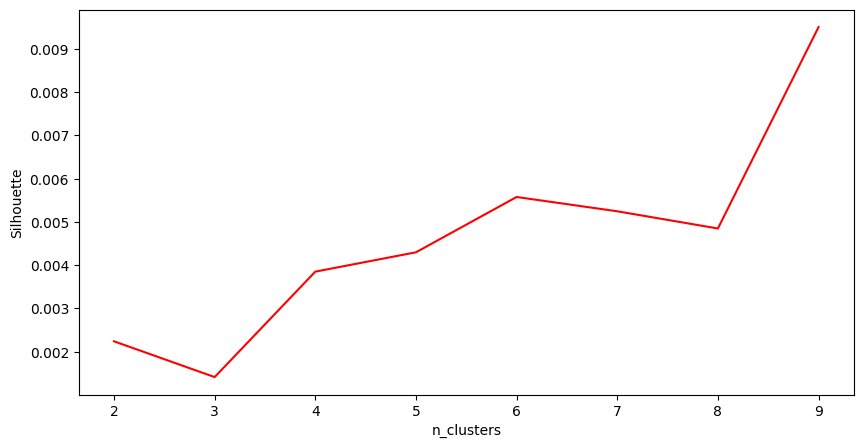

In [73]:
# Determine n cluster using Silhouette score
score = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    member = kmeans.fit_predict(X)

    siluet = silhouette_score(X, member, metric='euclidean')
    score.append(siluet)

plt.figure(figsize=(10,5))
plt.plot(range(2, 10), score, 'r-')
plt.ylabel('Silhouette')
plt.xlabel('n_clusters')

In [74]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

** **
#### Step 5: Cluster Result <a class="anchor\" id="eda"></a>
** **

In [78]:
for i, label in enumerate(clusters):
    print(f"Dokumen {i} → Cluster {label}")

Dokumen 0 → Cluster 1
Dokumen 1 → Cluster 0
Dokumen 2 → Cluster 0
Dokumen 3 → Cluster 0
Dokumen 4 → Cluster 1
Dokumen 5 → Cluster 0
Dokumen 6 → Cluster 0
Dokumen 7 → Cluster 0
Dokumen 8 → Cluster 0
Dokumen 9 → Cluster 0
Dokumen 10 → Cluster 0
Dokumen 11 → Cluster 0
Dokumen 12 → Cluster 0
Dokumen 13 → Cluster 1
Dokumen 14 → Cluster 0
Dokumen 15 → Cluster 0
Dokumen 16 → Cluster 0
Dokumen 17 → Cluster 0
Dokumen 18 → Cluster 0
Dokumen 19 → Cluster 0
Dokumen 20 → Cluster 0
Dokumen 21 → Cluster 0
Dokumen 22 → Cluster 0
Dokumen 23 → Cluster 1
Dokumen 24 → Cluster 0
Dokumen 25 → Cluster 0
Dokumen 26 → Cluster 1
Dokumen 27 → Cluster 1
Dokumen 28 → Cluster 0
Dokumen 29 → Cluster 0
Dokumen 30 → Cluster 0
Dokumen 31 → Cluster 0
Dokumen 32 → Cluster 0
Dokumen 33 → Cluster 0
Dokumen 34 → Cluster 0
Dokumen 35 → Cluster 0
Dokumen 36 → Cluster 2
Dokumen 37 → Cluster 0
Dokumen 38 → Cluster 0
Dokumen 39 → Cluster 0
Dokumen 40 → Cluster 0
Dokumen 41 → Cluster 0
Dokumen 42 → Cluster 0
Dokumen 43 → Cluster 

In [80]:
import numpy as np

terms = vectorizer.get_feature_names_out()
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]

for i in range(3):
    print(f"\nCluster {i}:")
    for ind in order_centroids[i, :10]:
        print(terms[ind])


Cluster 0:
aktor
fans
drakor
adaptasi
remake
karakter
falcon
fanatik
kasihan
bicara

Cluster 1:
abidzar
drakor
karakter
fans
ariel
aktor
tatum
blunder
sombong
tolol

Cluster 2:
snow
white
kasusnya
rachel
zegler
disney
tingkah
persis
miripnya
actornya
